In [4]:
import os

# Define the path to our images directory, going up one level from the 'notebooks' folder.
image_dir = '../data/food-101/food-101/images'

# Get a sorted list of all the folder names, filtering out any hidden files.
food_classes = sorted([folder for folder in os.listdir(image_dir) if not folder.startswith('.')])

# Print the total count and a sample of the first 10 classes.
print(f"Total number of food classes: {len(food_classes)}")
print("---------------------------------")
print("First 10 classes (a quick sample):")
print(food_classes[:10])

Total number of food classes: 101
---------------------------------
First 10 classes (a quick sample):
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [5]:
# This will print the entire list of 101 food classes
print("Full list of all 101 food classes:")
print(food_classes)

Full list of all 101 food classes:
['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni

Found 1000 images in the 'samosa' folder.


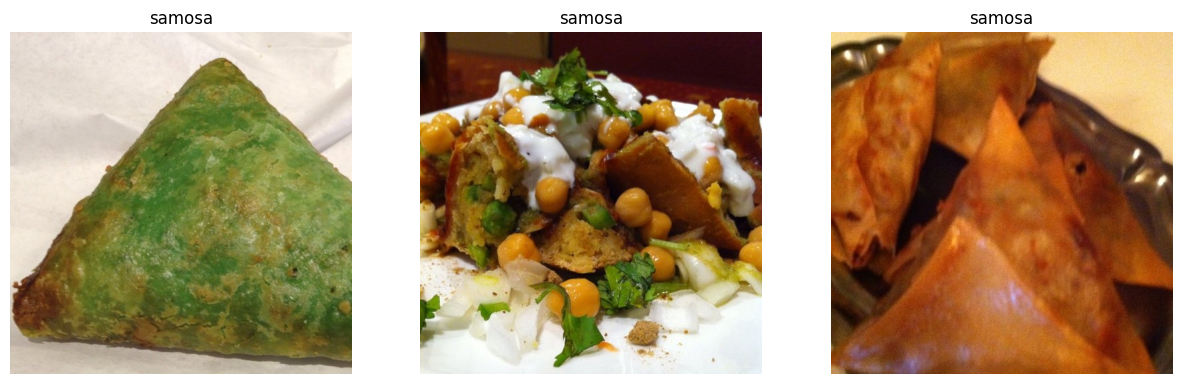

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

# Define the path to the images directory
image_dir = '../data/food-101/food-101/images'

# Choose a target class to visualize
target_class = 'samosa'

# Create the full path to the target class directory
target_folder = os.path.join(image_dir, target_class)

# Get a list of all image filenames in the target folder
image_filenames = os.listdir(target_folder)
print(f"Found {len(image_filenames)} images in the '{target_class}' folder.")

# Select 3 random image files to display
random_images = random.sample(image_filenames, 3)

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the random images, load, and display them
for i, img_filename in enumerate(random_images):
    img_path = os.path.join(target_folder, img_filename)
    img = mpimg.imread(img_path)
    ax[i].imshow(img)
    ax[i].set_title(target_class)
    ax[i].axis('off') # Hide the axes

plt.show()

In [1]:
import pandas as pd

# Define the path to our new nutrition data file
nutrition_csv_path = '../data/nutrition_data.csv'

# Load the CSV file into a pandas DataFrame
nutrition_df = pd.read_csv(nutrition_csv_path)

# Display the first 5 rows to check that it loaded correctly
print("Successfully loaded nutrition data:")
nutrition_df.head()

Successfully loaded nutrition data:


,food_class,calories
0,apple_pie,356
1,baby_back_ribs,544
2,baklava,403
3,beef_carpaccio,245
4,beef_tartare,232


In [2]:
# Define the path to the meta folder
meta_dir = '../data/food-101/food-101/meta'

# Open and read the train.txt file
with open(meta_dir + '/train.txt', 'r') as f:
    train_files = f.readlines()

# Print the total number of training images and show the first 5 entries
print(f"Total images in the training set: {len(train_files)}")
print("-----------------------------------")
print("First 5 entries in train.txt:")
for i in range(5):
    print(train_files[i].strip())

Total images in the training set: 75750
-----------------------------------
First 5 entries in train.txt:
apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283


In [3]:
# Open and read the test.txt file
with open(meta_dir + '/test.txt', 'r') as f:
    test_files = f.readlines()

# Print the total number of testing images and show the first 5 entries
print(f"Total images in the testing set: {len(test_files)}")
print("----------------------------------")
print("First 5 entries in test.txt:")
for i in range(5):
    print(test_files[i].strip())

Total images in the testing set: 25250
----------------------------------
First 5 entries in test.txt:
apple_pie/1011328
apple_pie/101251
apple_pie/1034399
apple_pie/103801
apple_pie/1038694


In [ ]:
import tensorflow as tf
import os # <-- ADD THIS LINE

# --- Constants ---
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
base_image_path = '../data/food-101/food-101/images/'

# --- 1. Create a mapping from class names to integer labels ---
# We get the class names from the folders we listed earlier
class_names = sorted([folder for folder in os.listdir(base_image_path) if not folder.startswith('.')])
label_to_index = {name: index for index, name in enumerate(class_names)}

# --- 2. Create full paths and numerical labels for train/test data ---
def get_paths_and_labels(file_list):
    image_paths = []
    labels = []
    for item in file_list:
        # Each item is like "apple_pie/1005649\n"
        item = item.strip()
        class_name = item.split('/')[0]
        
        image_paths.append(base_image_path + item + '.jpg')
        labels.append(label_to_index[class_name])
    return image_paths, labels

train_paths, train_labels = get_paths_and_labels(train_files)
test_paths, test_labels = get_paths_and_labels(test_files)

# --- 3. Create a function to load and preprocess images ---
def preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMAGE_SIZE)
    return image, label

# --- 4. Build the data pipelines ---
def create_data_pipeline(paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(paths))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

train_dataset = create_data_pipeline(train_paths, train_labels)
test_dataset = create_data_pipeline(test_paths, test_labels)

print("Data pipelines created successfully!")
print(f"Training dataset: {train_dataset}")
print(f"Testing dataset: {test_dataset}")


Data pipelines created successfully!
Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Testing dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.applications import EfficientNetB0

# Force the backend to use the correct image format
tf.keras.backend.set_image_data_format('channels_last')

# Define the Input Layer Explicitly
inputs = Input(shape=(224, 224, 3))

# Load the Base Model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=inputs)

# Freeze the Base Model
base_model.trainable = False

# Build Our Custom Head
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(101, activation='softmax')(x) # Changed to 101 classes
model = Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the Model Summary
print("Model created and compiled successfully!")
model.summary()